In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('Data_training.csv')
df_train.shape

(7000, 14)

In [3]:
df_test = pd.read_csv('Data_test.csv')
df_test.shape

(3000, 14)

In [4]:
df_train.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [5]:
df_train.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,5.250276,5.264678,5.243466,5.270859,3.751684,-1.251626,-1.251078,-1.248980,0.525894,0.522564,0.527096,0.521811,0.015828
std,2.747343,2.749102,2.742068,2.745012,0.752313,0.429955,0.434339,0.432248,0.275518,0.274097,0.273312,0.273177,0.036842
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999655,-1.999715,-1.999926,0.050009,0.050130,0.050054,0.050028,-0.080760
25%,2.860141,2.875962,2.855824,2.899285,3.221631,-1.623656,-1.629637,-1.621944,0.286624,0.286407,0.293213,0.285770,-0.015505
50%,5.255415,5.296482,5.261286,5.292473,3.746150,-1.250786,-1.252782,-1.246724,0.526437,0.521696,0.527206,0.520923,0.017306
75%,7.635409,7.649892,7.605950,7.655794,4.282341,-0.879971,-0.873508,-0.876252,0.763812,0.758958,0.764594,0.756993,0.044828
max,9.999469,9.999837,9.999450,9.997448,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999882,0.109403


In [6]:
import matplotlib.pyplot as plt

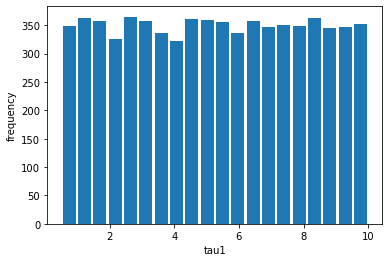

In [7]:
plt.hist(x = df_train['tau1'], bins = 'auto', rwidth = 0.85)
plt.xlabel('tau1')
plt.ylabel('frequency')

plt.show()

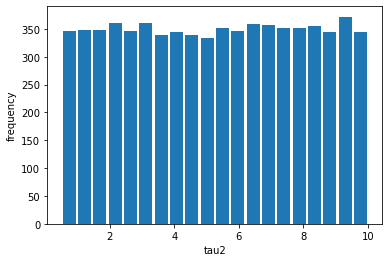

In [8]:
plt.hist(x = df_train['tau2'], bins = 'auto', rwidth = 0.85)
plt.xlabel('tau2')
plt.ylabel('frequency')

plt.show()

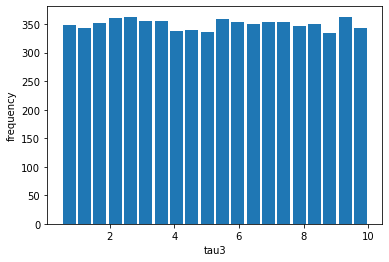

In [9]:
plt.hist(x = df_train['tau3'], bins = 'auto', rwidth = 0.85)
plt.xlabel('tau3')
plt.ylabel('frequency')

plt.show()

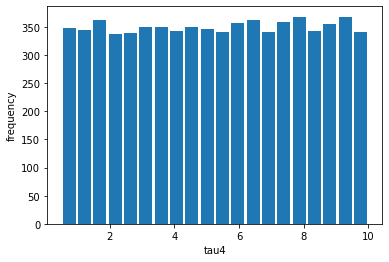

In [10]:
plt.hist(x = df_train['tau4'], bins = 'auto', rwidth = 0.85)
plt.xlabel('tau4')
plt.ylabel('frequency')

plt.show()

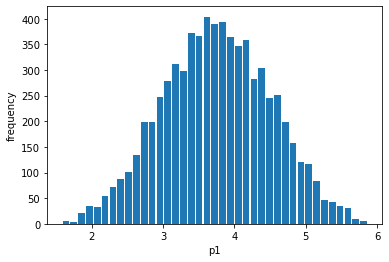

In [11]:
plt.hist(x = df_train['p1'], bins = 'auto', rwidth = 0.85)
plt.xlabel('p1')
plt.ylabel('frequency')

plt.show()

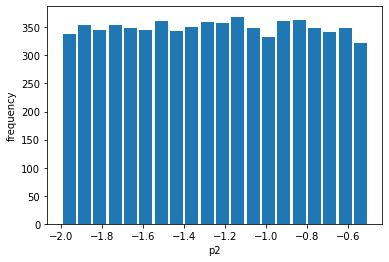

In [12]:
plt.hist(x = df_train['p2'], bins = 'auto', rwidth = 0.85)
plt.xlabel('p2')
plt.ylabel('frequency')

plt.show()

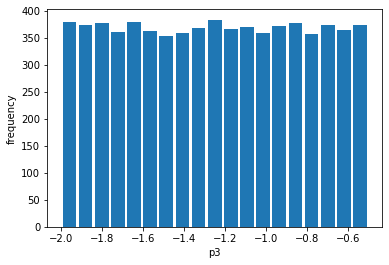

In [13]:
plt.hist(x = df_train['p3'], bins = 'auto', rwidth = 0.85)
plt.xlabel('p3')
plt.ylabel('frequency')

plt.show()

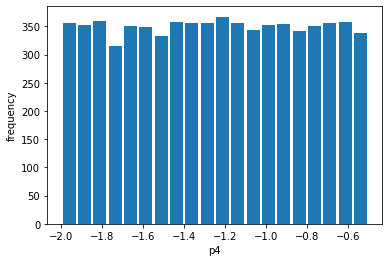

In [14]:
plt.hist(x = df_train['p4'], bins = 'auto', rwidth = 0.85)
plt.xlabel('p4')
plt.ylabel('frequency')

plt.show()

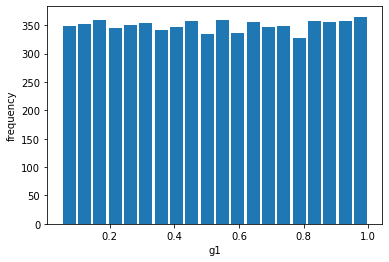

In [15]:
plt.hist(x = df_train['g1'], bins = 'auto', rwidth = 0.85)
plt.xlabel('g1')
plt.ylabel('frequency')

plt.show()

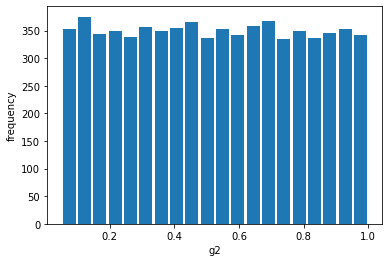

In [16]:
plt.hist(x = df_train['g2'], bins = 'auto', rwidth = 0.85)
plt.xlabel('g2')
plt.ylabel('frequency')

plt.show()

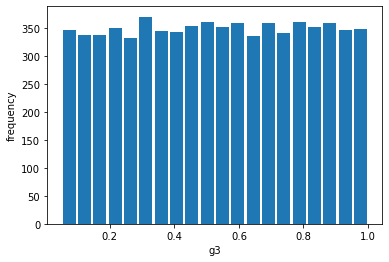

In [17]:
plt.hist(x = df_train['g3'], bins = 'auto', rwidth = 0.85)
plt.xlabel('g3')
plt.ylabel('frequency')

plt.show()

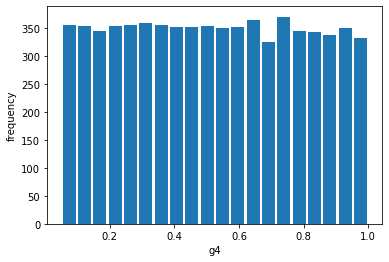

In [18]:
plt.hist(x = df_train['g4'], bins = 'auto', rwidth = 0.85)
plt.xlabel('g4')
plt.ylabel('frequency')

plt.show()

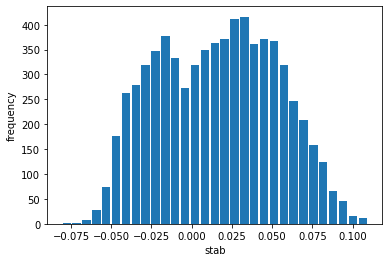

In [19]:
plt.hist(x = df_train['stab'], bins = 'auto', rwidth = 0.85)
plt.xlabel('stab')
plt.ylabel('frequency')

plt.show()

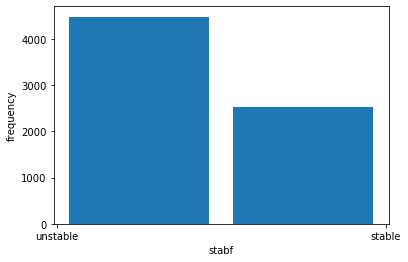

In [20]:
plt.hist(x = df_train['stabf'], bins = 2, rwidth = 0.85)
plt.xlabel('stabf')
plt.ylabel('frequency')

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [22]:
le = preprocessing.LabelEncoder()

X_train_ori = df_train.iloc[:, :-2].values
y_train_ori = df_train.iloc[:, -1].values

le.fit(y_train_ori)
y_train_ori = le.transform(y_train_ori)

X_train, X_val, y_train, y_val = train_test_split(X_train_ori, 
                                                  y_train_ori, 
                                                  test_size=0.3,
                                                  random_state=0)

X_test = df_test.iloc[:, :-2].values
y_test = df_test.iloc[:, -1].values

y_test = le.transform(y_test)

y_train_ori, y_test# unstable: 1   stable: 0

(array([1, 0, 1, ..., 0, 1, 1]), array([1, 0, 1, ..., 0, 1, 1]))

In [23]:
X_train.shape, X_val.shape, X_test.shape

((4900, 12), (2100, 12), (3000, 12))

Pruned Decision Tree

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf.fit(X_train, y_train)

print("The validation accuracy of original model: " 
      + str(dt_clf.score(X_val, y_val)))

The validation accuracy of original model: 0.8257142857142857


In [26]:
from sklearn.metrics import roc_curve, auc

In [27]:
def auc_score(X_test, y_test, clf):
    scores = clf.predict_proba(X_test)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, scores)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    return roc_auc

print("The validation AUC of original model: " 
      + str(auc_score(X_val, y_val, dt_clf)))

The validation AUC of original model: 0.8077514277493782


In [28]:
#the following code for post pruning decision trees was modiﬁed from：
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

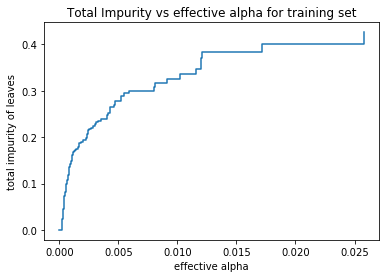

In [29]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [30]:
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03520456480071721


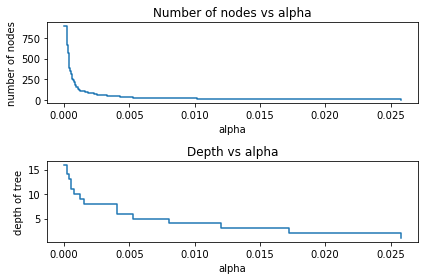

In [31]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

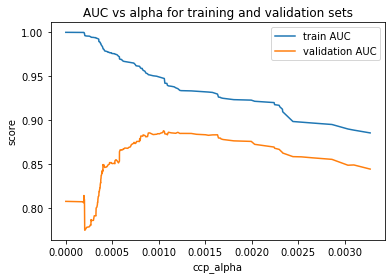

When ccp_alpha is 0.001051628380820928, AUC of ROC is 0.8880586352726026


In [33]:
train_AUC = []
validation_AUC = []

for clf in clfs:
    train_AUC.append(auc_score(X_train, y_train, clf))
    validation_AUC.append(auc_score(X_val, y_val, clf))

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("score")
ax.set_title("AUC vs alpha for training and validation sets")
ax.plot(ccp_alphas[:270], train_AUC[:270], label="train AUC")
ax.plot(ccp_alphas[:270], validation_AUC[:270], label="validation AUC")
ax.legend()
plt.show()

max_val_index = validation_AUC.index(max(validation_AUC))
print("When ccp_alpha is " + str(ccp_alphas[max_val_index]) + ", AUC of ROC is " + str(max(validation_AUC)))

In [34]:
dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[max_val_index])
dt_clf.fit(X_train, y_train)

print("The validation accuracy of final model: " 
      + str(dt_clf.score(X_val, y_val)))

The validation accuracy of final model: 0.8514285714285714


In [35]:
import graphviz 
from sklearn.tree import export_graphviz

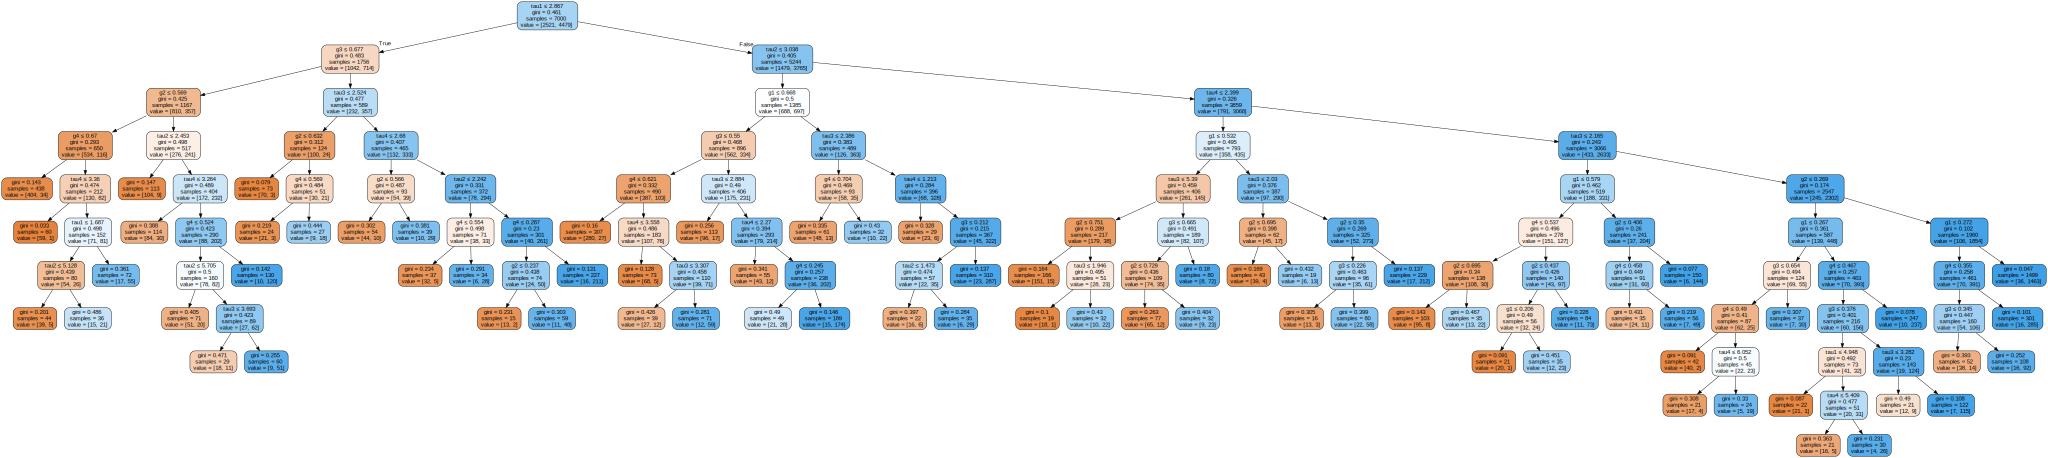

In [36]:
optimal_dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[max_val_index])
# train the original training set
optimal_dt_clf.fit(X_train_ori, y_train_ori)

dot_data = export_graphviz(optimal_dt_clf, 
                           out_file=None, 
                           feature_names = ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4'], 
                           filled=True, 
                           rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Pruned_Tree")
graph

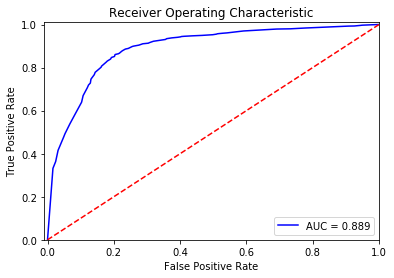

In [37]:
def plot_ROC(X_test, y_test, clf):
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_ROC(X_test, y_test, optimal_dt_clf)

In [38]:
optimal_dt_clf.score(X_test, y_test)

0.8416666666666667

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
def cm_text(X_test, y_test, clf):
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict, labels=[0, 1])
    print("Confusion Matrix:")
    print("        stable   unstable")
    print("stable    " + str(cm[0][0]) + "     " + str(cm[0][1]))
    print("unstable  " + str(cm[1][0]) + "     " + str(cm[1][1]))
    
    return cm

cm_dt = cm_text(X_test, y_test, optimal_dt_clf)

Confusion Matrix:
        stable   unstable
stable    818     281
unstable  194     1707


In [41]:
import seaborn as sns

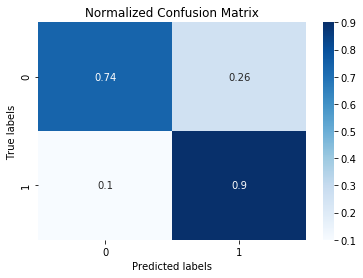

In [42]:
def plot_cm(cm):
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]     
    cm_norm = np.around(cm_norm, decimals=2)

    sns.heatmap(cm_norm, annot=True, cmap='Blues')

    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

plot_cm(cm_dt)

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [44]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=0)

score = cross_validate(rf_clf, 
                       X_train_ori, 
                       y_train_ori, 
                       cv=5, 
                       scoring='roc_auc')['test_score'].mean()

print("The cross validation AUC of original model: " + str(score))

The cross validation AUC of original model: 0.9772304596218409


In [45]:
score = cross_validate(rf_clf, 
                       X_train_ori, 
                       y_train_ori, 
                       cv=5)['test_score'].mean()

print("The cross validation accuracy of original model: " + str(score))

The cross validation accuracy of original model: 0.9154285714285713


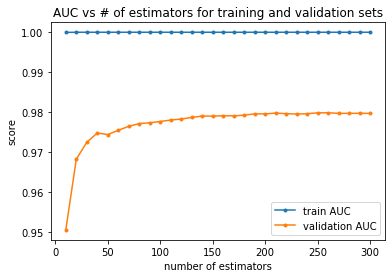

When n_estimators is 260, AUC of ROC is 0.9798794739103187


In [46]:
n_estimators = range(10,301,10)
train_AUC_rf = []
val_AUC_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    
    train_AUC_rf.append(auc_score(X_train, y_train, rf))
    val_AUC_rf.append(auc_score(X_val, y_val, rf))
    
fig, ax = plt.subplots()
ax.set_xlabel("number of estimators")
ax.set_ylabel("score")
ax.set_title("AUC vs # of estimators for training and validation sets")
ax.plot(n_estimators, train_AUC_rf, label="train AUC", marker='.')
ax.plot(n_estimators, val_AUC_rf, label="validation AUC", marker='.')
ax.legend()
plt.show()

max_index_rf = val_AUC_rf.index(max(val_AUC_rf))
print("When n_estimators is " + str(n_estimators[max_index_rf]) + ", AUC of ROC is " + str(max(val_AUC_rf)))

In [47]:
#n_estimators = range(50, 201, 10)
max_depth = range(4, 31, 2)

In [48]:
param_grid = {'max_depth': max_depth,}

In [49]:
rf_clf = RandomForestClassifier(n_estimators = 260, random_state=0)

rf_random = GridSearchCV(estimator=rf_clf, 
                         param_grid=param_grid, 
                         scoring='roc_auc',
                         cv=5,  
                         n_jobs=-1, 
                         verbose=1)

rf_random.fit(X_train_ori, y_train_ori)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   34.6s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=260, random_state=0),
             n_jobs=-1, param_grid={'max_depth': range(4, 31, 2)},
             scoring='roc_auc', verbose=1)

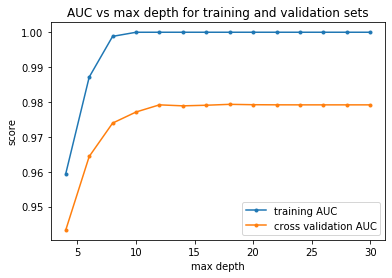

When max depth is 18, AUC of ROC is 0.9793198377881964


In [50]:
train_AUC_rf = []
val_AUC_rf = []

for d in max_depth:
    clf = RandomForestClassifier(n_estimators=260, 
                                 max_depth=d,
                                 n_jobs=-1, 
                                 random_state=0)
    scores = cross_validate(clf, 
                            X_train_ori, 
                            y_train_ori, 
                            cv=5, 
                            scoring='roc_auc',
                            return_train_score=True)
    
    train_score = scores['train_score'].mean()
    val_score = scores['test_score'].mean()
    train_AUC_rf.append(train_score)
    val_AUC_rf.append(val_score)
    
fig, ax = plt.subplots()
ax.set_xlabel("max depth")
ax.set_ylabel("score")
ax.set_title("AUC vs max depth for training and validation sets")

ax.plot(max_depth, train_AUC_rf, label="training AUC", marker='.')
ax.plot(max_depth, val_AUC_rf, label="cross validation AUC", marker='.')
ax.legend()
plt.show()

max_index_rf = val_AUC_rf.index(max(val_AUC_rf))
print("When max depth is " + str(max_depth[max_index_rf]) + ", AUC of ROC is " + str(max(val_AUC_rf)))

In [51]:
rf_random.best_params_

{'max_depth': 18}

In [52]:
rf_random.best_score_

0.9793198377881964

In [53]:
optimal_rf_clf = RandomForestClassifier(n_estimators=260,
                                        max_depth=18,
                                        random_state=0)

score = cross_validate(optimal_rf_clf, 
                       X_train_ori, 
                       y_train_ori, 
                       cv=5)['test_score'].mean()

print("The cross validation accuracy of final model: " + str(score))

The cross validation accuracy of final model: 0.9184285714285714


In [54]:
optimal_rf_clf.fit(X_train_ori, y_train_ori)

optimal_rf_clf.score(X_test, y_test)

0.9123333333333333

In [55]:
auc_score(X_test, y_test, optimal_rf_clf)

0.9778278660864761

In [56]:
fm = optimal_rf_clf.feature_importances_
fm

array([0.12696546, 0.12556266, 0.12098311, 0.12036169, 0.02955912,
       0.03091876, 0.03000948, 0.02967356, 0.09826275, 0.0924172 ,
       0.10309818, 0.09218805])

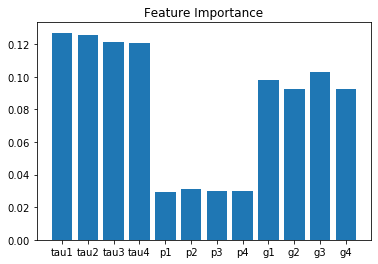

In [57]:
features = ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']
plt.bar(range(len(features)), fm, tick_label=features)
plt.title("Feature Importance")
plt.show()

In [58]:
cm_rf = cm_text(X_test, y_test, optimal_rf_clf)

Confusion Matrix:
        stable   unstable
stable    932     167
unstable  96     1805


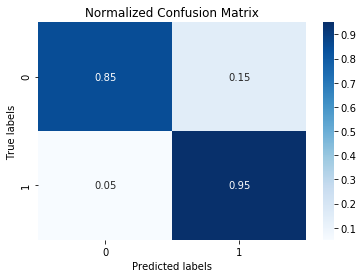

In [59]:
plot_cm(cm_rf)

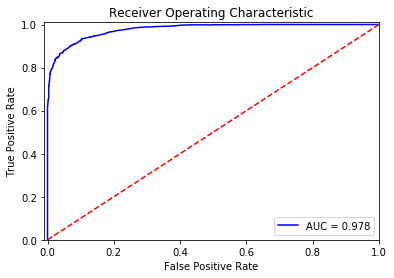

In [60]:
plot_ROC(X_test, y_test, optimal_rf_clf)

GBDT

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc_clf = GradientBoostingClassifier(random_state=0)

score = cross_validate(gbc_clf, 
                       X_train_ori, 
                       y_train_ori, 
                       cv=5, 
                       scoring='roc_auc')['test_score'].mean()

print("The cross validation AUC of original model: " + str(score))

The cross validation AUC of original model: 0.9774897085494734


In [63]:
score = cross_validate(gbc_clf, 
                       X_train_ori, 
                       y_train_ori, 
                       cv=5)['test_score'].mean()

print("The cross validation accuracy of original model: " + str(score))

The cross validation accuracy of original model: 0.919142857142857


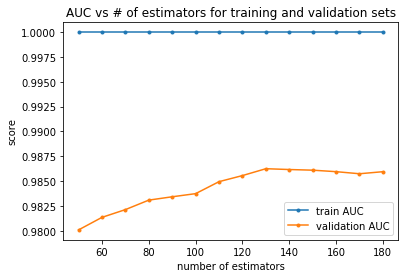

When n_estimators is 130, AUC of ROC is 0.9862447333882494


In [64]:
n_estimators = range(50, 181, 10)
train_AUC_gbc = []
val_AUC_gbc = []

for estimator in n_estimators:
    gbc = GradientBoostingClassifier(n_estimators=estimator, 
                                    learning_rate=0.5, 
                                    min_samples_split=50,
                                    min_samples_leaf=20,
                                    max_depth=8,
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=0)
    gbc.fit(X_train, y_train)
    
    train_AUC_gbc.append(auc_score(X_train, y_train, gbc))
    val_AUC_gbc.append(auc_score(X_val, y_val, gbc))
    
fig, ax = plt.subplots()
ax.set_xlabel("number of estimators")
ax.set_ylabel("score")
ax.set_title("AUC vs # of estimators for training and validation sets")
ax.plot(n_estimators, train_AUC_gbc, label="train AUC", marker='.')
ax.plot(n_estimators, val_AUC_gbc, label="validation AUC",marker='.')
ax.legend()
plt.show()

max_index_gbc = val_AUC_gbc.index(max(val_AUC_gbc))
print("When n_estimators is " + str(n_estimators[max_index_gbc]) + ", AUC of ROC is " + str(max(val_AUC_gbc)))

In [65]:
max_depth = range(5, 31)
min_samples_split = range(10, 61, 5)
min_samples_leaf = range(6, 31, 2)
max_features = range(1, 13)

In [66]:
param_grid_gbc = {'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'max_features': max_features
                  }

In [67]:
gbc_clf = GradientBoostingClassifier(n_estimators=130, 
                                     learning_rate=0.5,
                                     subsample=0.8,
                                     random_state=0)

gbc_random = RandomizedSearchCV(estimator=gbc_clf, 
                                param_distributions=param_grid_gbc, 
                                scoring='roc_auc',
                                cv=5, 
                                n_iter=30, 
                                n_jobs=-1, 
                                verbose=1, 
                                random_state=0) 

gbc_random.fit(X_train_ori, y_train_ori)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                        n_estimators=130,
                                                        random_state=0,
                                                        subsample=0.8),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': range(5, 31),
                                        'max_features': range(1, 13),
                                        'min_samples_leaf': range(6, 31, 2),
                                        'min_samples_split': range(10, 61, 5)},
                   random_state=0, scoring='roc_auc', verbose=1)

In [68]:
gbc_random.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 28,
 'max_features': 12,
 'max_depth': 13}

In [69]:
gbc_random.best_score_

0.9868201754771733

In [70]:
param_subsample = {'subsample': [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]}

gbc_clf = GradientBoostingClassifier(n_estimators=130,
                                     learning_rate=0.5,
                                     min_samples_split=50,
                                     min_samples_leaf=28,
                                     max_features=12,
                                     max_depth=13,
                                     random_state=0)

gbc_random = GridSearchCV(estimator=gbc_clf, 
                          param_grid=param_subsample, 
                          scoring='roc_auc',
                          cv=5, 
                          n_jobs=-1, 
                          verbose=1) 

gbc_random.fit(X_train_ori, y_train_ori)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   55.8s finished


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.5,
                                                  max_depth=13, max_features=12,
                                                  min_samples_leaf=28,
                                                  min_samples_split=50,
                                                  n_estimators=130,
                                                  random_state=0),
             n_jobs=-1,
             param_grid={'subsample': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9, 0.95, 1]},
             scoring='roc_auc', verbose=1)

In [71]:
gbc_random.best_params_

{'subsample': 0.8}

In [72]:
gbc_random.best_score_

0.9868201754771733

"""
All parameters we need:
    n_estimators=130,
    learning_rate=0.5,
    max_depth=13,
    min_samples_leaf=28,
    min_samples_split=50,
    max_features=12,
    subsample=0.8
"""

In [73]:
#half learning rate and double # trees
gbc_clf_t1 = GradientBoostingClassifier(n_estimators=260,
                                        learning_rate=0.25,
                                        min_samples_split=50,
                                        min_samples_leaf=28,
                                        max_features=12,
                                        max_depth=13,
                                        subsample=0.8,
                                        random_state=0)

score_t1 = cross_val_score(gbc_clf_t1, X_train_ori, y_train_ori, cv=5, scoring='roc_auc').mean()
score_t1

0.987312608967615

In [74]:
#one-tenth
gbc_clf_t2 = GradientBoostingClassifier(n_estimators=1300,
                                        learning_rate=0.05,
                                        min_samples_split=50,
                                        min_samples_leaf=28,
                                        max_features=12,
                                        max_depth=13,
                                        subsample=0.8,
                                        random_state=0)

score_t2 = cross_val_score(gbc_clf_t2, X_train_ori, y_train_ori, cv=5, scoring='roc_auc').mean()
print("The cross validation AUC of final model: " + str(score_t2))

The cross validation AUC of final model: 0.9881699536633454


In [75]:
score = cross_val_score(gbc_clf_t2, X_train_ori, y_train_ori, cv=5).mean()
print("The cross validation accuracy of final model: " + str(score))

The cross validation accuracy of final model: 0.9405714285714286


In [76]:
optimal_gbc_clf = gbc_clf_t2
optimal_gbc_clf.fit(X_train_ori, y_train_ori)
optimal_gbc_clf.score(X_test, y_test)

0.9416666666666667

In [77]:
auc_score(X_test, y_test, optimal_gbc_clf)

0.9876766167320584

In [78]:
fm = optimal_gbc_clf.feature_importances_
fm

array([0.13303036, 0.13308532, 0.13506728, 0.13095973, 0.00405685,
       0.00524907, 0.0044098 , 0.0040204 , 0.11701185, 0.10466442,
       0.11864124, 0.10980366])

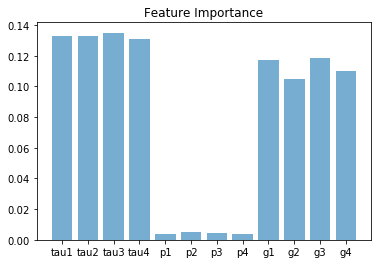

In [79]:
features = ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']
plt.bar(range(len(features)), fm, tick_label=features, alpha=0.6)
plt.title("Feature Importance")
plt.show()

In [80]:
cm_gbc = cm_text(X_test, y_test, optimal_gbc_clf)

Confusion Matrix:
        stable   unstable
stable    992     107
unstable  68     1833


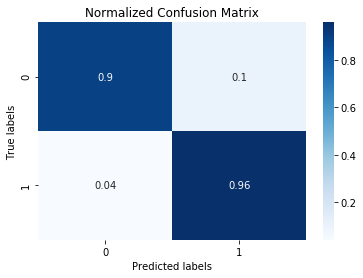

In [81]:
plot_cm(cm_gbc)

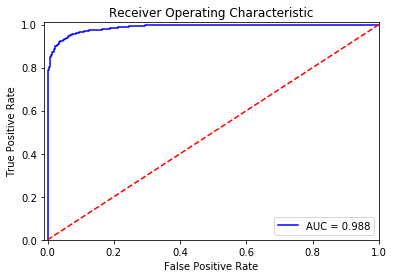

In [82]:
plot_ROC(X_test, y_test, optimal_gbc_clf)

Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
scaler.fit(X_train_ori)
X_train_std = scaler.transform(X_train_ori)
X_test_std = scaler.transform(X_test)

X_train_std.shape

(7000, 12)

In [86]:
lr_none_clf = LogisticRegression(random_state=0, 
                                 penalty='none', 
                                 solver='saga', 
                                 max_iter=1000)

auc_roc = cross_val_score(lr_none_clf, 
                          X_train_ori, 
                          y_train_ori, 
                          cv=5, 
                          scoring='roc_auc').mean()
acc = cross_val_score(lr_none_clf, 
                      X_train_ori, 
                      y_train_ori, 
                      cv=5).mean()

print("The cross validation AUC of original model: " + str(auc_roc))
print("The cross validation accuracy of original model: " + str(acc))

The cross validation AUC of original model: 0.8966276301317746
The cross validation accuracy of original model: 0.8208571428571428


In [87]:
from sklearn.pipeline import make_pipeline

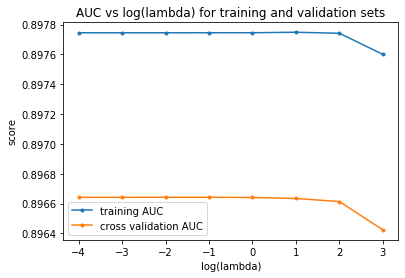

When lambda is 0.01, AUC of ROC is 0.8966426851732567


In [88]:
lambda_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]

train_AUC_lr = []
val_AUC_lr = []

for lam in lambda_values:
    clf = LogisticRegression(penalty='l2', C=1/lam, solver='saga', random_state=0)
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_validate(pipeline, 
                            X_train_ori, 
                            y_train_ori, 
                            cv=5, 
                            scoring='roc_auc',
                            return_train_score=True)
    train_score = scores['train_score'].mean()
    val_score = scores['test_score'].mean()
    train_AUC_lr.append(train_score)
    val_AUC_lr.append(val_score)
    
fig, ax = plt.subplots()
ax.set_xlabel("log(lambda)")
ax.set_ylabel("score")
ax.set_title("AUC vs log(lambda) for training and validation sets")

ax.plot(np.log10(lambda_values), train_AUC_lr, label="training AUC",marker='.')
ax.plot(np.log10(lambda_values), val_AUC_lr, label="cross validation AUC",marker='.')
ax.legend()
plt.show()

max_index_lr = val_AUC_lr.index(max(val_AUC_lr))
print("When lambda is " + str(lambda_values[max_index_lr]) + ", AUC of ROC is " + str(max(val_AUC_lr)))

In [89]:
lr_l2_clf = LogisticRegression(penalty='l2', C=100, solver='saga', max_iter=1000, random_state=0)

acc = cross_val_score(lr_l2_clf, X_train_ori, y_train_ori, cv=5).mean()
acc

0.8208571428571428

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_ori)# before standardization
X_test_poly = poly.fit_transform(X_test)

X_train_poly.shape, X_test_poly.shape

((7000, 91), (3000, 91))

In [92]:
lr_poly_clf = LogisticRegression(random_state=0, 
                                 penalty='none', 
                                 solver='saga', 
                                 max_iter=5000)
pipeline = make_pipeline(StandardScaler(), lr_poly_clf)
auc_roc = cross_validate(pipeline, 
                         X_train_poly, 
                         y_train_ori, 
                         cv=5, 
                         scoring='roc_auc')['test_score'].mean()
acc = cross_validate(pipeline, 
                     X_train_poly, 
                     y_train_ori, 
                     cv=5)['test_score'].mean()

print("The cross validation AUC of final model: " + str(auc_roc))
print("The cross validation accuracy of final model: " + str(acc))

The cross validation AUC of final model: 0.9861172223399658
The cross validation accuracy of final model: 0.9414285714285715


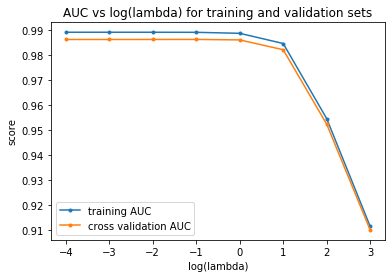

When lambda is 0.1, AUC of ROC is 0.9861393903688198


In [93]:
lambda_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]

train_AUC_lr = []
val_AUC_lr = []

for lam in lambda_values:
    clf = LogisticRegression(penalty='l2', 
                             C=1/lam, 
                             solver='saga', 
                             max_iter=5000,
                             random_state=0)
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_validate(pipeline, 
                            X_train_poly, 
                            y_train_ori, 
                            cv=5, 
                            scoring='roc_auc',
                            return_train_score=True)
    train_score = scores['train_score'].mean()
    val_score = scores['test_score'].mean()
    train_AUC_lr.append(train_score)
    val_AUC_lr.append(val_score)
    
fig, ax = plt.subplots()
ax.set_xlabel("log(lambda)")
ax.set_ylabel("score")
ax.set_title("AUC vs log(lambda) for training and validation sets")

ax.plot(np.log10(lambda_values), train_AUC_lr, label="training AUC",marker='.')
ax.plot(np.log10(lambda_values), val_AUC_lr, label="cross validation AUC",marker='.')
ax.legend()
plt.show()

max_index_lr = val_AUC_lr.index(max(val_AUC_lr))
print("When lambda is " + str(lambda_values[max_index_lr]) + ", AUC of ROC is " + str(max(val_AUC_lr)))

In [94]:
val_AUC_lr

[0.909911517801838,
 0.952242267163044,
 0.9820175279735283,
 0.9859494974741352,
 0.9861393903688198,
 0.9861247533089375,
 0.9861185509964283,
 0.9861185509964283]

In [95]:
lr_clf = LogisticRegression(penalty='l2', 
                            C=10, 
                            solver='saga', 
                            max_iter=5000,
                            random_state=0)
pipeline = make_pipeline(StandardScaler(), lr_clf)
acc = cross_validate(pipeline, 
                     X_train_poly, 
                     y_train_ori, 
                     cv=5)['test_score'].mean()

print("The cross validation accuracy of final model: " + str(acc))

The cross validation accuracy of final model: 0.9417142857142858


In [96]:
scaler.fit(X_train_poly)
X_train_poly_std = scaler.transform(X_train_poly)
X_test_poly_std = scaler.transform(X_test_poly)

X_train_poly_std.shape

(7000, 91)

In [97]:
optimal_lr_clf = LogisticRegression(penalty='l2', 
                                    C=10, 
                                    solver='saga', 
                                    max_iter=5000,
                                    random_state=0)
optimal_lr_clf.fit(X_train_poly_std, y_train_ori)
optimal_lr_clf.score(X_test_poly_std, y_test)

0.939

In [98]:
auc_score(X_test_poly_std, y_test, optimal_lr_clf)

0.9862880462799379

In [99]:
cm_lr = cm_text(X_test_poly_std, y_test, optimal_lr_clf)

Confusion Matrix:
        stable   unstable
stable    1010     89
unstable  94     1807


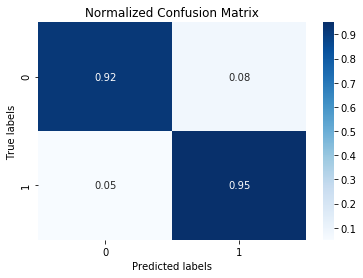

In [100]:
plot_cm(cm_lr)

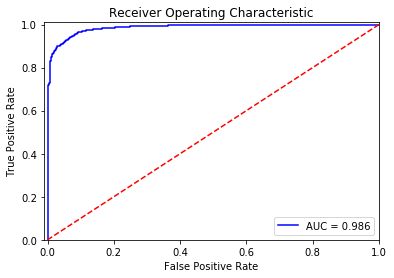

In [101]:
plot_ROC(X_test_poly_std, y_test, optimal_lr_clf)

In [102]:
from itertools import product

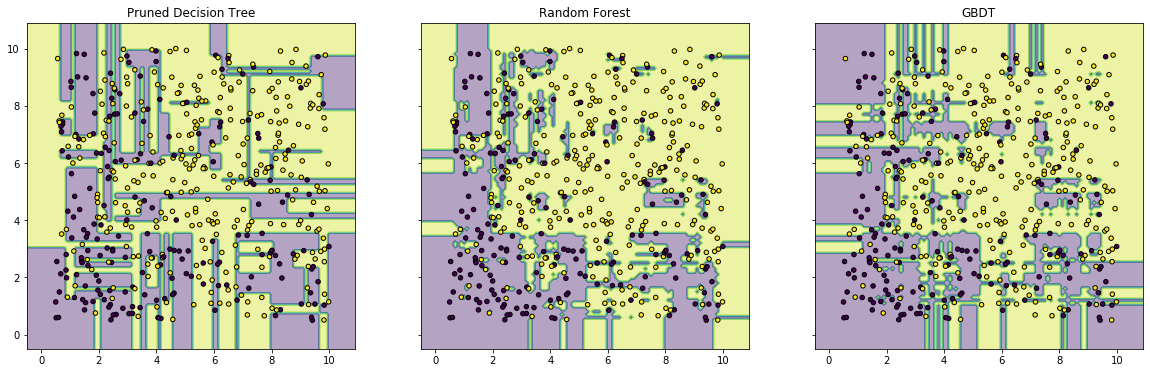

In [103]:
#the following code for plot the decision boundaries was modiﬁed from:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
clf1 = optimal_dt_clf
clf2 = optimal_rf_clf
clf3 = GradientBoostingClassifier(n_estimators=1300,
                                  learning_rate=0.05,
                                  min_samples_split=50,
                                  min_samples_leaf=28,
                                  max_features=2,
                                  max_depth=13,
                                  subsample=0.8,
                                  random_state=0)

# Plotting decision regions
def plot_decision_boundary(X, y):
    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 6))

    for idx, clf, tt in zip([(0,0),(0,1),(0,2)],
                            [clf1, clf2, clf3],
                            ['Pruned Decision Tree', 
                             'Random Forest',
                             'GBDT']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                      s=20, edgecolor='k')
        axarr[idx[1]].set_title(tt)

    plt.show()
    
plot_decision_boundary(df_train.iloc[:500, :2].values, y_train_ori[:500])

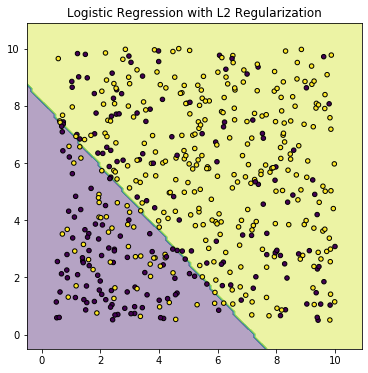

In [104]:
clf4 = lr_l2_clf

# Plotting decision regions
def plot_decision_boundary(X, y):
    clf4.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(6, 6))

    Z = clf4.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.4)
    axarr.scatter(X[:, 0], X[:, 1], c=y,
                     s=20, edgecolor='k')
    axarr.set_title('Logistic Regression with L2 Regularization')

    plt.show()
    
plot_decision_boundary(df_train.iloc[:500, :2].values, y_train_ori[:500])

In [105]:
import pickle

In [106]:
fw = open('model.txt','wb')
pickle.dump(optimal_gbc_clf, fw)
fw.close()